## Part 1

Firstly we do the monte carlo simulation to find the mean at least tiles to make percolation(assume the result is $k$) 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def dfs(grid, visited, x, y, n) -> bool: 
    DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]   
    stack = [(x, y)]
    while stack:
        cx, cy = stack.pop()
        if visited[cx, cy]:
            continue
        visited[cx, cy] = True
        for dx, dy in DIRECTIONS:
            nx, ny = cx + dx, cy + dy
            if (0 <= nx < n and 0 <= ny < n) and not visited[nx, ny] and grid[nx, ny] == 1:
                if nx == n - 1:  
                    return True
                stack.append((nx, ny))
    return False

def percolates(grid, n) -> bool:
    visited = np.zeros((n, n), dtype=bool)
    for col in range(n):
        if grid[0, col] == 1 and not visited[0, col] and dfs(grid, visited, 0, col, n):
            return True
    return False

def monte_carlo_simulation(n) -> Tuple[float, int]:
    grid = np.zeros((n, n), dtype=int)  
    open_sites = 0
    while True:
        x, y = random.randint(0, n - 1), random.randint(0, n - 1)
        while grid[x, y] == 1:  
            x, y = random.randint(0, n - 1), random.randint(0, n - 1)
        grid[x, y] = 1
        open_sites += 1
        if percolates(grid, n):
            return open_sites / (n * n), open_sites  

def estimate_percolation_threshold(n, trials)-> Tuple[float, int]:
    thresholds = []
    nums = []
    for _ in range(trials):
        threshold, num = monte_carlo_simulation(n)
        thresholds.append(threshold)
        nums.append(num)
    return np.mean(thresholds), int(np.mean(nums))



In [7]:
n = 20  
trials = 1000


estimated_threshold, mean_nums_tile = estimate_percolation_threshold(n, trials)
print(f"The Percolation threshold for a {n} * {n} grid: {estimated_threshold}")

The Percolation threshold for a 20 * 20 grid: 0.5916075000000001


From above we know that if $n=20$, $k=237$

In [2]:
n = 50  
trials = 1000
estimated_threshold, mean_nums_tile = estimate_percolation_threshold(n, trials)
print(f"The Percolation threshold for a {n} * {n} grid: {estimated_threshold}")

The Percolation threshold for a 50 * 50 grid: 0.5917344000000001


From above we know that if $n=50$, $k=1480$

In [5]:
n = 100 
trials = 100


estimated_threshold, mean_nums_tile = estimate_percolation_threshold(n, trials)
print(f"The Percolation threshold for a {n} * {n} grid: {estimated_threshold}")

KeyboardInterrupt: 

## Part 2
### Task A

$P(\sigma=+1|\boldsymbol{\sigma}_ {-k}  )$
$=\dfrac{P(\sigma=+1,\boldsymbol{\sigma}_ {-k}  )}{P(\boldsymbol{\sigma}_{-k} )}$

$=\dfrac{P(\sigma=+1,\boldsymbol{\sigma}_ {-k}  )}{P(\boldsymbol{\sigma}_{-k},\sigma_k=+1)+P(\boldsymbol{\sigma}_{-k},\sigma_k=-1)}$

<br>

Let $\boldsymbol{\sigma_1}=(\boldsymbol{\sigma_{-k} },\sigma_k=+1),\boldsymbol{\sigma_2}=(\boldsymbol{\sigma_{-k} },\sigma_k=-1)$

$H(\boldsymbol{\sigma_1 })=\sum_{(v,w)\in \Omega}{\sigma_v \sigma_w}$

$=H(\boldsymbol{\sigma_k} )-\sum_{v\sim k}{\sigma_k \sigma_v}$

$=H(\boldsymbol{\sigma_k} )-\sum_{v\sim k}{\sigma_v}$

Similarly,$H(\boldsymbol{\sigma_2 })=H(\boldsymbol{\sigma_k} )+\sum_{v\sim k}{\sigma_v}$

$\Rightarrow H(\boldsymbol{\sigma_2 })=H(\boldsymbol{\sigma_1 })+2\sum_{v\sim k}{\sigma_v}$

<br>

$\therefore P(\sigma_k=+1|\sigma_{-k})$

$=\dfrac{e^{-\beta H(\boldsymbol{\sigma_1}) } }{e^{-\beta H(\boldsymbol{\sigma_1}) } +e^{-\beta H(\boldsymbol{\sigma_2}) } }$

$=\dfrac{e^{-\beta H(\boldsymbol{\sigma_1}) } }{e^{-\beta H(\boldsymbol{\sigma_1}) } +e^{-\beta H(\boldsymbol{\sigma_1 })+2\sum_{v\sim k}{\sigma_v} } }$

$=\dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

<br>

$\therefore P(\sigma_k=-1|\sigma_{-k})=1-P(\sigma_k=+1|\sigma_{-k})$

=$1-\dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

=$\dfrac{e^{-2\beta\sum_{v\sim k}{\sigma_v} }}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

$=\dfrac{1}{1+e^{2\beta\sum_{v\sim k}{\sigma_v} }}$


$\therefore P(\sigma=+1|\boldsymbol{\sigma}_ {-k}  ) = \dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }, \quad P(\sigma_k=-1|\sigma_{-k})=\dfrac{1}{1+e^{2\beta\sum_{v\sim k}{\sigma_v} }}$

### Method of Task B, C
We chose the physical model, i.e., the cyclic boundary, as the set of edges. To continue the idea from Task A, we used Gibbs sampling, randomising a point at each step and choosing whether to reset it to 1 or -1 based on its conditional probability. Each test starts with a randomly generated +1-1 grid. We treat spin=+1/-1 as grey scale in order to visualise the changing process of the ising model, and draw each state of the grid as a black-and-white box plot, with two colours corresponding to two states. We output the boxplot once every tenth of the `steps`.

### Task B
- $ \beta = -1 $: Gradually a perfect grid of black and white is generated. This suggests that each spin tends to behave in the opposite state to the neighbouring spins. $\beta < 0$ is non-physical since the temperature cannot smaller than 0. Normally, each spin should gradually become similar through the interaction of neighbouring nodes, and this current unlikely situation produces the exact opposite run.
- $ \beta = 0 $: The generated results are always completely random. This is because this case corresponds to the case of temperature infinity, where each spin is affected by the infinity of the molecular thermal motion, so that the effect of neighbouring spins can be completely neglected, leading to a purely random case. Corresponds to the loss of magnetism at high temperatures.
- $ \beta = 0.441 $: The black and white blocks of colour are no longer distributed completely randomly, with identical colours gradually coming closer together to form large, less obvious areas of colour. It is known from physics that the current temperature corresponds to the phase transition temperature of the magnet, or the critical temperature. Each spin of the magnet starts to be influenced by its neighbour spins at this temperature, gradually showing convergence.
- $ \beta = 0.8 $: Black and white colour blocks gradually shrink into tangible continuous areas. At the current temperature, the environmental temperature is so low, so that the influence of neighbouring spins easily outweighs the influence of the temperature, and so the spins naturally tend to change to the same state as their neighbours. Corresponds to the fact that magnets have magnetic poles at low temperatures.

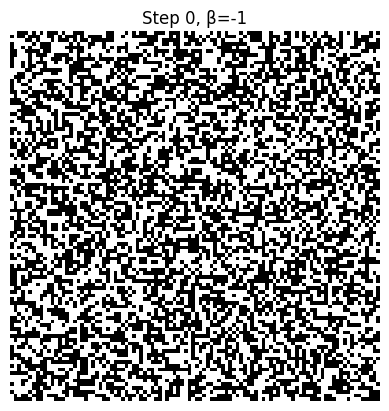

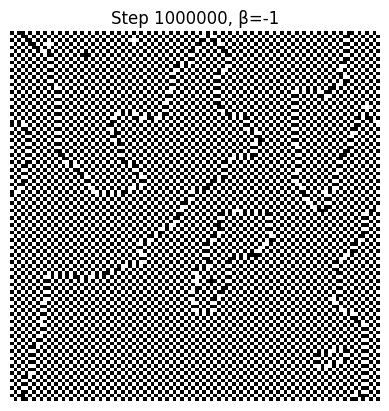

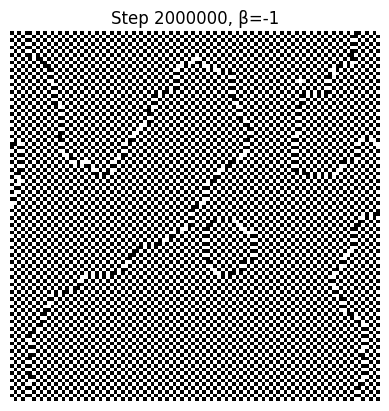

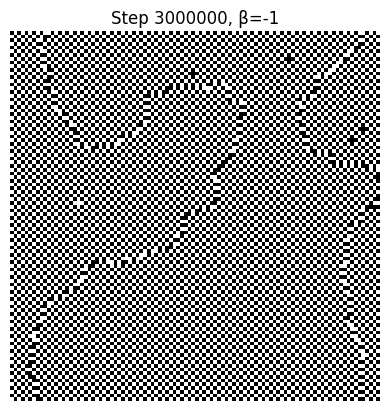

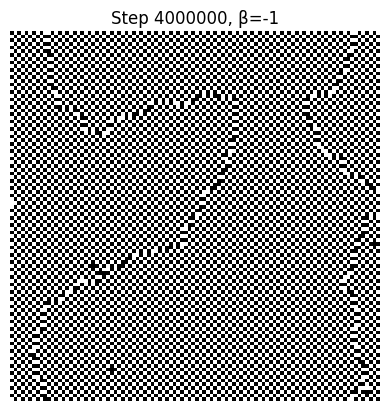

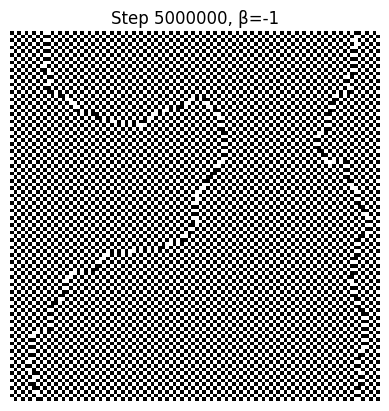

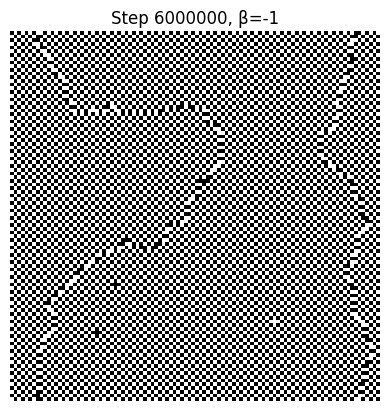

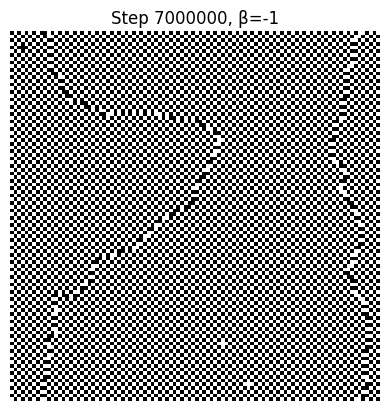

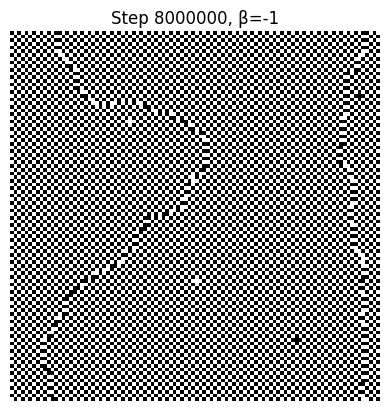

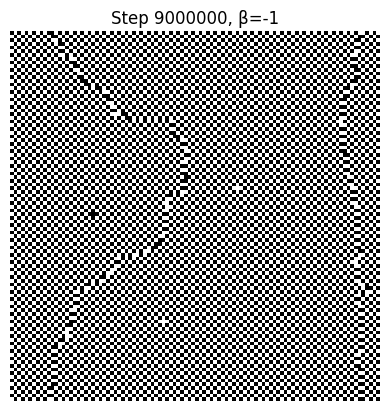

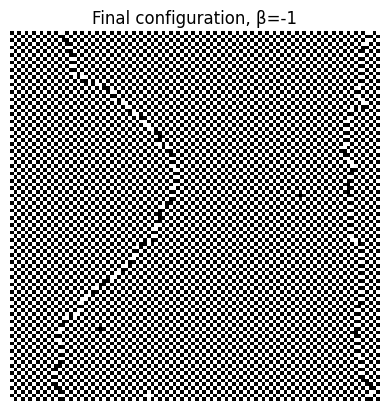

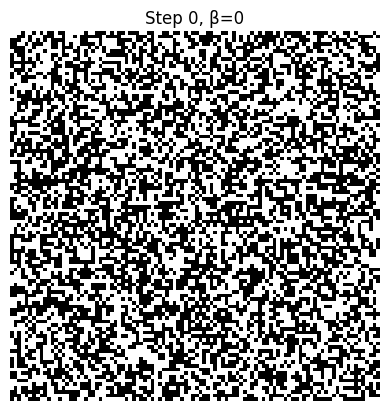

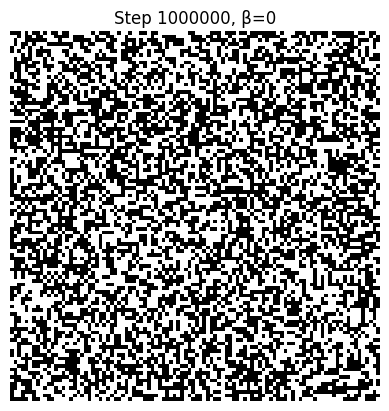

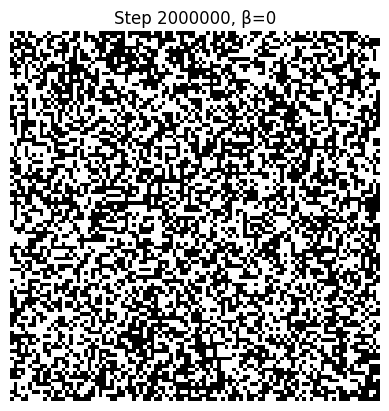

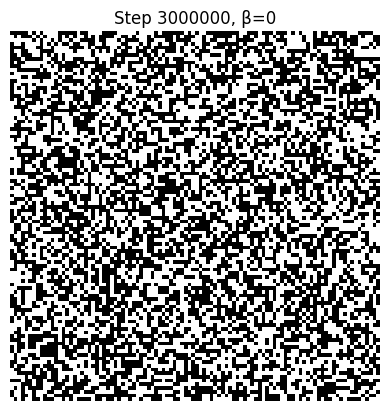

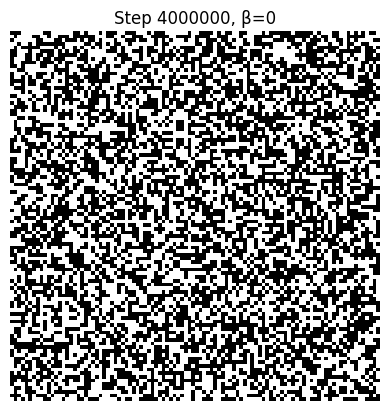

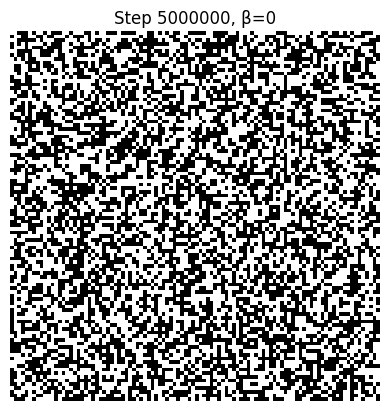

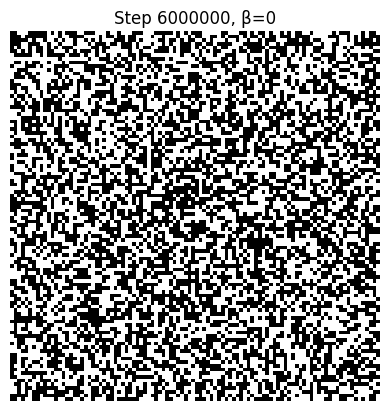

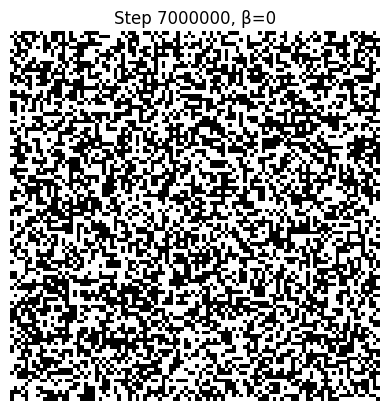

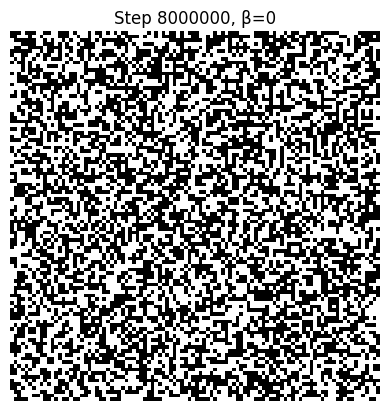

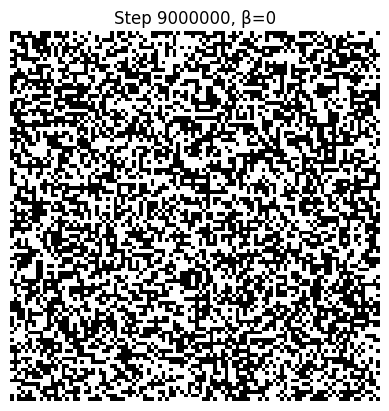

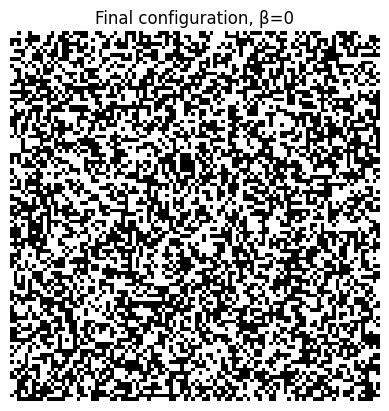

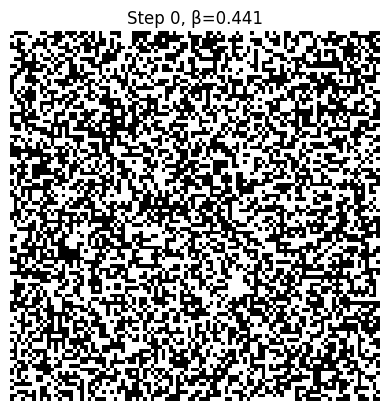

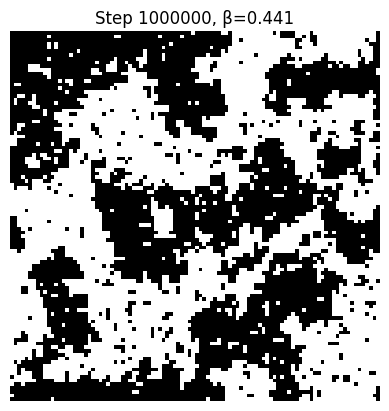

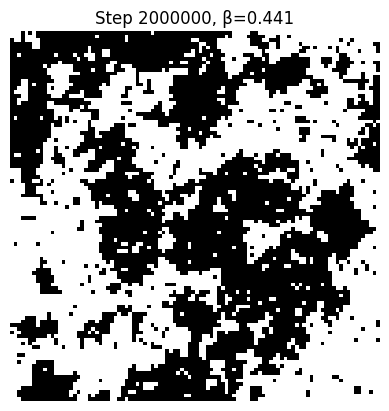

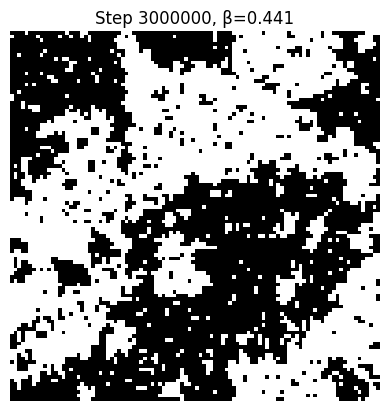

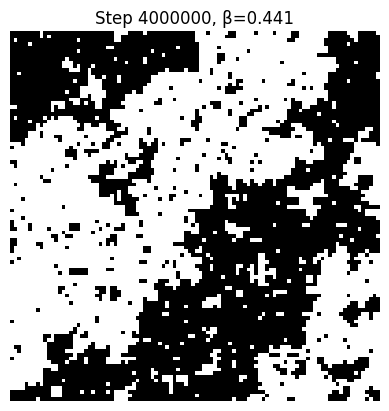

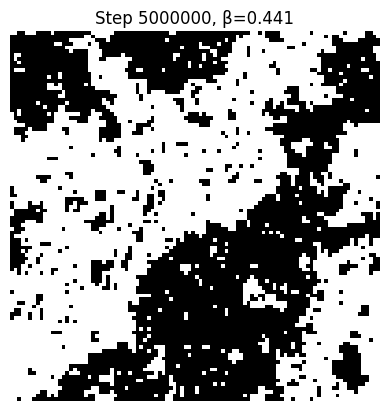

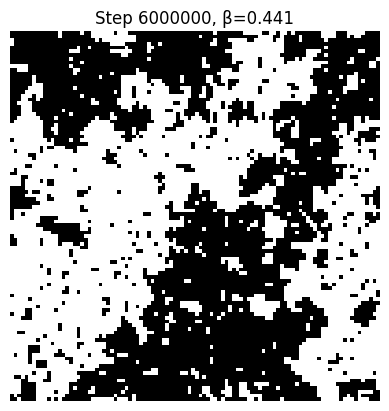

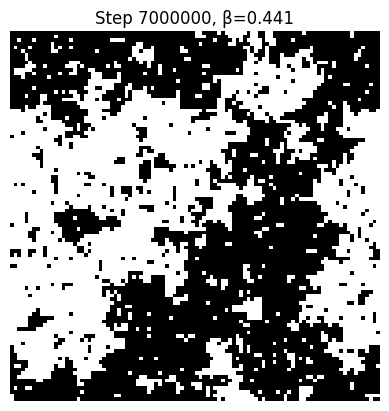

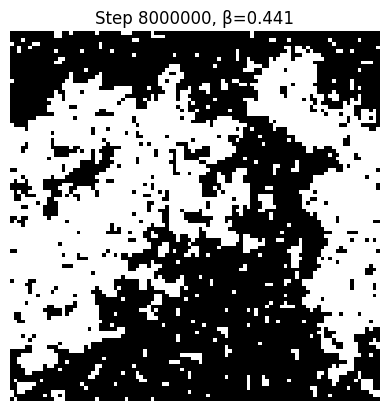

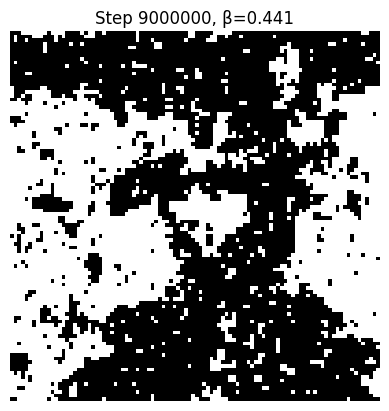

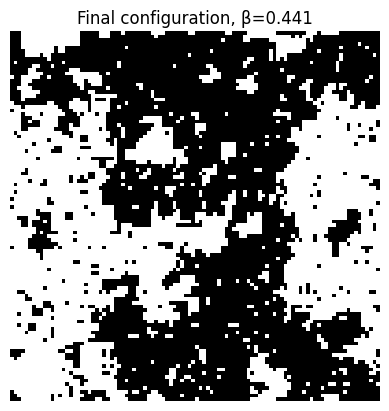

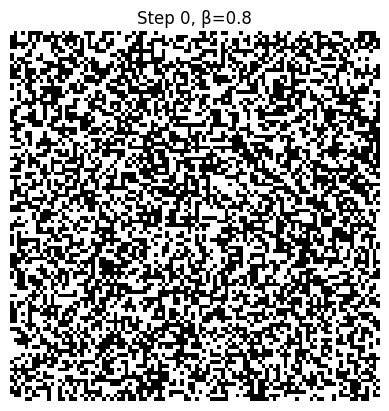

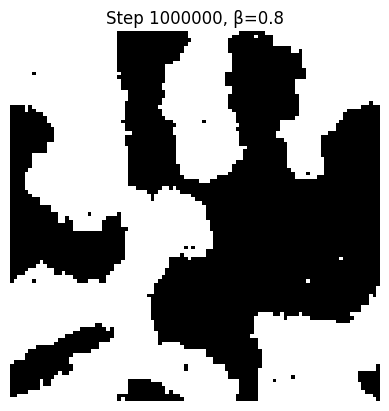

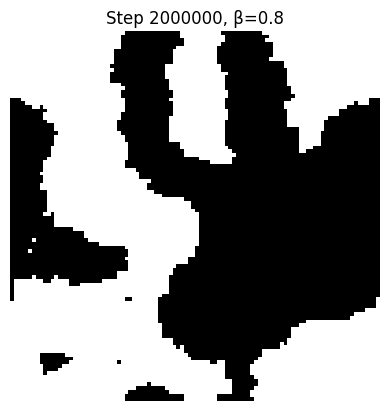

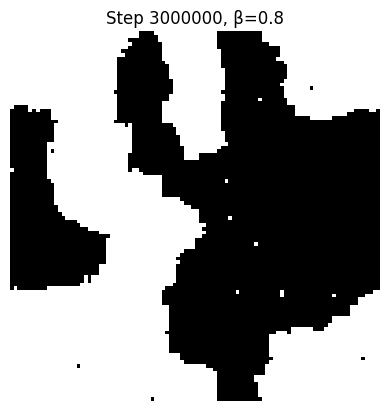

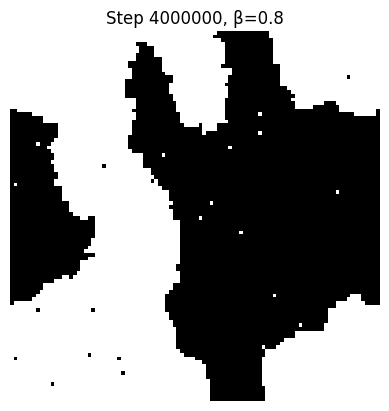

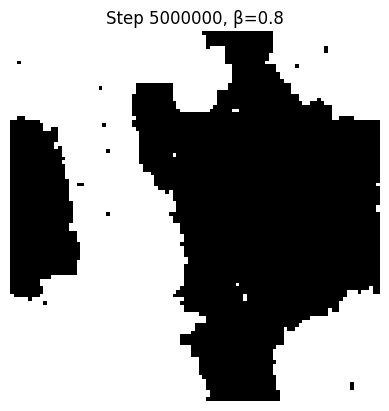

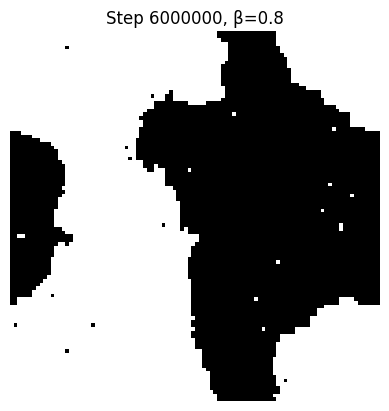

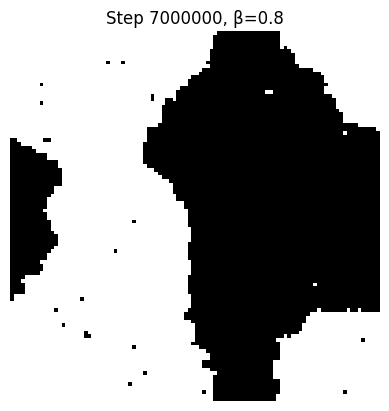

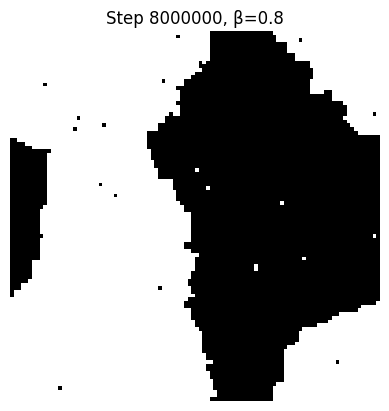

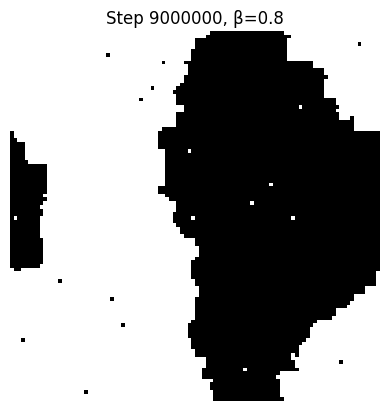

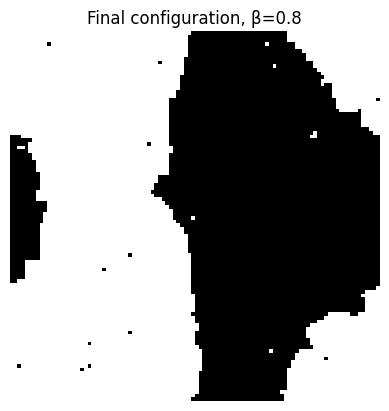

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_grid(n):
    return np.random.choice([-1, 1], size=(n, n))

def gibbs_step(grid, beta):
    n = grid.shape[0]
    i = np.random.randint(0, n)
    j = np.random.randint(0, n)
    # Assume periodic boundary conditions
    neighbors = (
        grid[(i - 1) % n, j] +
        grid[(i + 1) % n, j] +
        grid[i, (j - 1) % n] +
        grid[i, (j + 1) % n]
    )
    # neighbors = 0
    # if i > 0:
    #     neighbors += grid[i - 1, j]
    # if i < n - 1:
    #     neighbors += grid[i + 1, j]
    # if j > 0:
    #     neighbors += grid[i, j - 1]
    # if j < n - 1:
    #     neighbors += grid[i, j + 1]

    # Calculate the conditional probability given the neighbors
    prob = 1 / (1 + np.exp(-2 * beta * neighbors))
    grid[i, j] = 1 if np.random.rand() < prob else -1


def simulate_ising_gibbs(n, beta, steps):
    grid = initialize_grid(n)
    for step in range(steps):
        gibbs_step(grid, beta)
        if step % (steps // 10) == 0:
            # Display the grid every 10% of the steps
            plt.imshow(grid, cmap='gray')
            plt.title(f"Step {step}, β={beta}")
            plt.axis('off')
            plt.show()
    return grid

n = 100
betas = [-1, 0, 0.441, 0.8]
steps = 10000000

for beta in betas:
    final_grid = simulate_ising_gibbs(n, beta, steps)
    plt.imshow(final_grid, cmap='gray')
    plt.title(f"Final configuration, β={beta}")
    plt.axis('off')
    plt.show()


### Task C

- $ \beta = -5 $: Gradually a perfect grid of black and white is generated. This suggests that each spin tends to behave in the opposite state to the neighbouring spins. $\beta < 0$ is non-physical since the temperature cannot smaller than 0. Normally, each spin should gradually become similar through the interaction of neighbouring nodes, and this current unlikely situation produces the exact opposite run.
- $ \beta = 0.2 $: The black and white colour blocks appear more randomly and there are no clear large colour blocks produced. While not an ambient temperature at infinity, it is still a high temperature well beyond the critical temperature, and the influence of the environment outweighs the neighbouring spins, leading to more randomness than limitation.
- $ \beta = 0.441 $: The black and white blocks of colour are no longer distributed completely randomly, with identical colours gradually coming closer together to form large, less obvious areas of colour. It is known from physics that the current temperature corresponds to the phase transition temperature of the magnet, or the critical temperature. Each spin of the magnet starts to be influenced by its neighbour spins at this temperature, gradually showing convergence. The most important is that the formation of black and white regions seems to be more pronounced compared to $ n = 100 $, probably because the presence of more spins produces stronger interaction forces.
- $ \beta = 0.6 $: Black and white colour blocks gradually shrink into tangibler continuous areas than $\beta =0.441$ since the temperature is lower. At the current temperature, the environmental temperature is so low, so that the influence of neighbouring spins easily outweighs the influence of the temperature, and so the spins naturally tend to change to the same state as their neighbours. Corresponds to the fact that magnets have magnetic poles at low temperatures.

In [ ]:
n = 300
betas = [-5, 0.2, 0.441, 0.6]
steps = 10000000

for beta in betas:
    final_grid = simulate_ising_gibbs(n, beta, steps)
    plt.imshow(final_grid, cmap='gray')
    plt.title(f"Final configuration, β={beta}")
    plt.axis('off')
    plt.show()

From above we know that if $n=100$, $k=5903$



Then suppose there are at least $k$ tiles opened to make a percolation. And the probability of each tile opened is $p$. So the probability of percolation is $\sum_{i=1}^{n^2-k+1} = (\frac{p}{1-p})^ip^{k-1}(1-p)^{n^2-k+1} = \frac{p^k(1-p)^{n^2-k}(1-(\frac{p}{1-p})^{n^2-k+1})}{1-\frac{p}{1-p}}$


# Part 2

## Task 1


$=\dfrac{P(\sigma=+1,\boldsymbol{\sigma}_ {-k}  )}{P(\boldsymbol{\sigma}_{-k} )}$

$=\dfrac{P(\sigma=+1,\boldsymbol{\sigma}_ {-k}  )}{P(\boldsymbol{\sigma}_{-k},\sigma_k=+1)+P(\boldsymbol{\sigma}_{-k},\sigma_k=-1)}$

<br>

Let $\boldsymbol{\sigma_1}=(\boldsymbol{\sigma_{-k} },\sigma_k=+1),\boldsymbol{\sigma_2}=(\boldsymbol{\sigma_{-k} },\sigma_k=-1)$

$H(\boldsymbol{\sigma_1 })=\sum_{(v,w)\in \Omega}{\sigma_v \sigma_w}$

$=H(\boldsymbol{\sigma_k} )-\sum_{v\sim k}{\sigma_k \sigma_v}$

$=H(\boldsymbol{\sigma_k} )-\sum_{v\sim k}{\sigma_v}$

Similarly,$H(\boldsymbol{\sigma_2 })=H(\boldsymbol{\sigma_k} )+\sum_{v\sim k}{\sigma_v}$

$\Rightarrow H(\boldsymbol{\sigma_2 })=H(\boldsymbol{\sigma_1 })+2\sum_{v\sim k}{\sigma_v}$

<br>

$\therefore P(\sigma_k=+1|\sigma_{-k})$

$=\dfrac{e^{-\beta H(\boldsymbol{\sigma_1}) } }{e^{-\beta H(\boldsymbol{\sigma_1}) } +e^{-\beta H(\boldsymbol{\sigma_2}) } }$

$=\dfrac{e^{-\beta H(\boldsymbol{\sigma_1}) } }{e^{-\beta H(\boldsymbol{\sigma_1}) } +e^{-\beta H(\boldsymbol{\sigma_1 })+2\sum_{v\sim k}{\sigma_v} } }$

$=\dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

<br>

$\therefore P(\sigma_k=-1|\sigma_{-k})=1-P(\sigma_k=+1|\sigma_{-k})$

=$1-\dfrac{1}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

=$\dfrac{e^{-2\beta\sum_{v\sim k}{\sigma_v} }}{1+e^{-2\beta\sum_{v\sim k}{\sigma_v} } }$

$=\dfrac{1}{1+e^{2\beta\sum_{v\sim k}{\sigma_v} }}$